# A Finite Element Examples: Truss 01

This example is based on the truss01 example distributed with FEM.edu

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.elements.Truss import Truss
from femedu.materials.FiberMaterial import FiberMaterial

## Build a model

In [3]:
# initialize a system model
B = 6.0 * 12
H = 3.0 * 12
params = {'E': 10., 'A': 1., 'nu': 0.0, 'fy': 1.e30}

model = System()

# create nodes
nd0 = Node(0.0, 0.0)
nd1 = Node(  B, 0.0)
nd2 = Node(0.5*B, H)

model += nd0
model += nd1
model += nd2

# create elements
model += Truss(nd0, nd1, FiberMaterial(params))  # bottom 1
model += Truss(nd0, nd2, FiberMaterial(params))  # up right diag 1
model += Truss(nd1, nd2, FiberMaterial(params))  # up left diag 1

# define support(s)
nd0.fixDOF(['ux','uy'])    # horizontal and vertical support left end
nd1.fixDOF('uy')           # vertical support right end



## Load the model and solve

In [4]:
# add loads
# .. load only the upper nodes
nd2.setLoad([0.0, -1.0],['ux','uy'])

# analyze the model
model.solve()

# write out report
model.report()


System Analysis Report

Nodes:
---------------------
  Node 0: {'ux': 0, 'uy': 1}
          x:[0. 0.], fix:['ux', 'uy'], 
          P:[0. 0.], u:[0. 0.]
  Node 1: {'ux': 0, 'uy': 1}
          x:[72.  0.], fix:['uy'], 
          P:[0. 0.], u:[3.6 0. ]
  Node 2: {'ux': 0, 'uy': 1}
          x:[36. 36.], fix:[], 
          P:[ 0. -1.], u:[ 1.8        -6.89116882]

Elements:
---------------------
  Truss: node 0 to node 1:
     material properties: FiberMaterial(Material)({'E': 10.0, 'A': 1.0, 'nu': 0.0, 'fy': 1e+30})  strain:0.04761904761904761   stress:{'xx': 0.4761904761904761, 'yy': 0.0, 'zz': 0.0, 'xy': 0.0}  
     internal force: 0.4761904761904761
     Pe: [ 0.4761904761904761 0.0 ]
  Truss: node 0 to node 2:
     material properties: FiberMaterial(Material)({'E': 10.0, 'A': 1.0, 'nu': 0.0, 'fy': 1e+30})  strain:-0.05823563981487166   stress:{'xx': -0.5823563981487166, 'yy': 0.0, 'zz': 0.0, 'xy': 0.0}  
     internal force: -0.5823563981487166
     Pe: [ -0.46140136076020055 -0.355

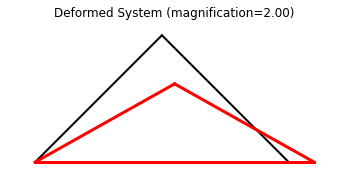

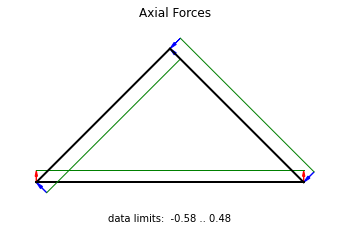

In [5]:
# create plots
model.plot(factor=2.)
model.beamValuePlot('f')

### Compare behavior against fixed-fixed conditions

We are using the same model but add one restraint at `nd1`

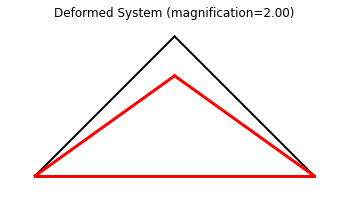

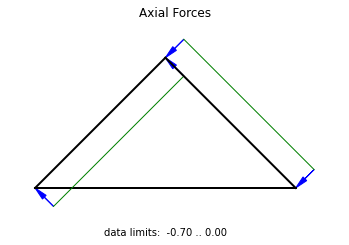

In [6]:
# fix horizontal motion of node 1
nd1.fixDOF('ux')

# add loads: same load -- nothing to do

# RE-analyze the model
model.resetDisp()
model.solve()

# skip the report
#model.report()

# create plots
model.plot(factor=2.)
model.beamValuePlot('F')